<a href="https://colab.research.google.com/github/LILY-182/life-expectancy-data-preprocessing/blob/main/advanced_data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
## steps followed Data processing:
# 1. import the necessary libraries
#2. reading or creating datasets
#3. Sanity check - Quick summary on data
#4.Explore data analysis with data visualization
#5. Handling missing values
#6. Handle ouliers
#7. Hnadling duplicates
#8. Data normalization
#9. Data encoding

step1.: Importing necessary libraries

In [6]:
import pandas as pd
import numpy as np

#Data visualization pyhton librsries
import matplotlib.pyplot as plt
import seaborn as sns

###step2 : reading datasets
we can either read csv(.csv) and excel datasets

In [7]:
df = pd.read_csv('/content/Life Expectancy Data.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


## step3: sanity check -
performed to get a quick sammary about the datat so as to understand it before pre-processing

In [8]:
#shape
df.shape

(2938, 22)

In [9]:
#info
#total entries
#total columns
#data types
#1. objects: category(text)
#2. int64: discrete
#3. float64: continuous
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [10]:
#checking missing values
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [11]:
#represent the missing values as percentage
#incase you find record with more than 50%, has to be deleted
#df = df.drop(columns=')
# df.shape = (2938,22)
df.isnull().sum()/ df.shape[0]*100

,0
Country,0.000000
Year,0.000000
Status,0.000000
Life expectancy,0.340368
Adult Mortality,0.340368
infant deaths,0.000000
Alcohol,6.603131
percentage expenditure,0.000000
Hepatitis B,18.822328
Measles,0.000000


In [12]:
#check duplicates
df.duplicated().sum()


0

In [13]:
#check for garbage
# Data entry that is irrelevant, erroneous, or nonsensical in the context of the dataset(objects)
#they are on text only(objects)
for i in df.select_dtypes(include='object').columns:
    print(df[i].value_counts())
    print("===================")

Country
Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Niue                      1
San Marino                1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Name: count, Length: 193, dtype: int64
Status
Developing    2426
Developed      512
Name: count, dtype: int64


## step4:exploratory data analysis
this analysis is used to understand whether the data at hand is suitable for further analysis(stats,outlier, correlation, distribution)

In [14]:
#statistical analysis
#numerical
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


In [15]:
#cateporical(objects)
df.describe(include='object').T

,count,unique,top,freq
Country,2938,193,Afghanistan,16
Status,2938,2,Developing,2426


<Axes: xlabel='Life expectancy ', ylabel='Count'>

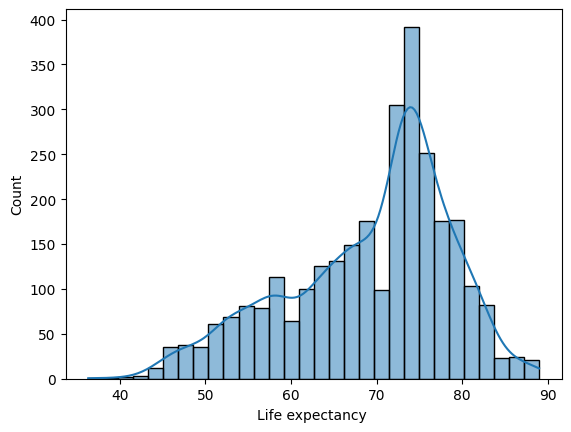

In [16]:
#TYPES OF ANALYSIS
#1. Uni-variant analysis: performed on a single variable(histplot)
#2. bi-variant analysis:two columns(correlation,linear rlsp) e.g scatterplot
#3. multi-variant
#data visualization
#1. Data distribution
#histogram - numerical data
sns.histplot(data=df,x=df['Life expectancy '], kde=True)

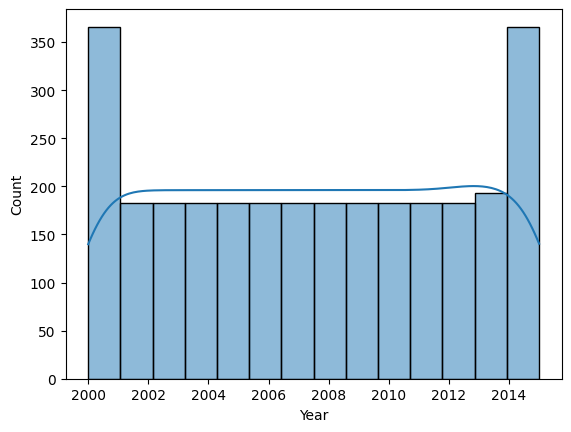

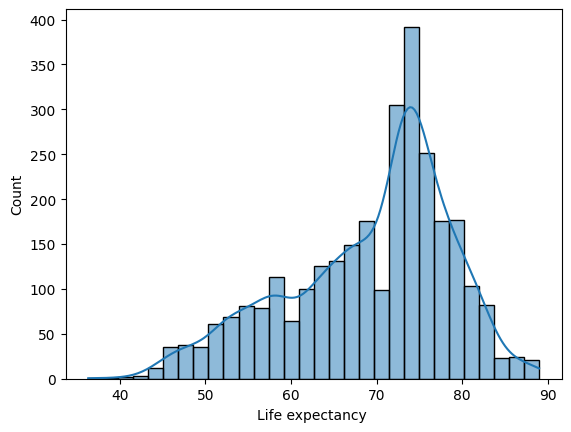

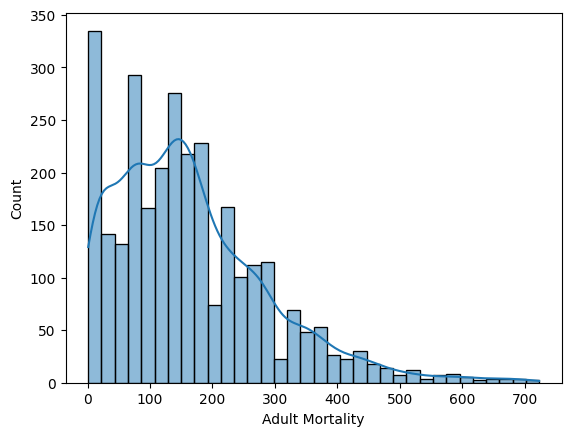

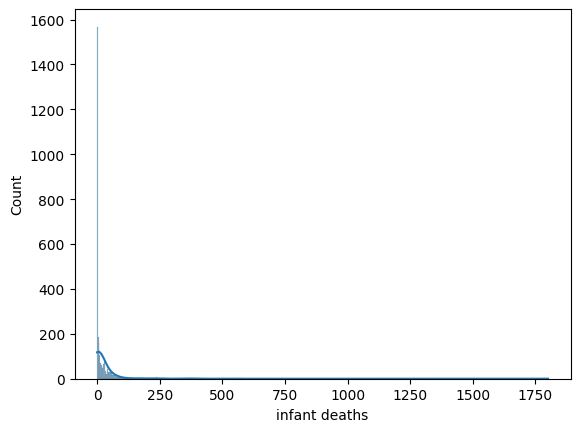

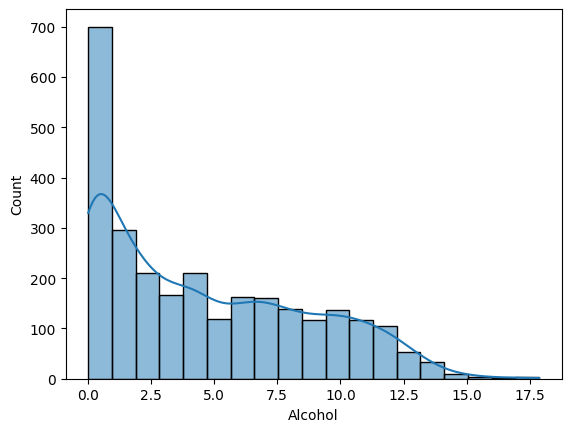

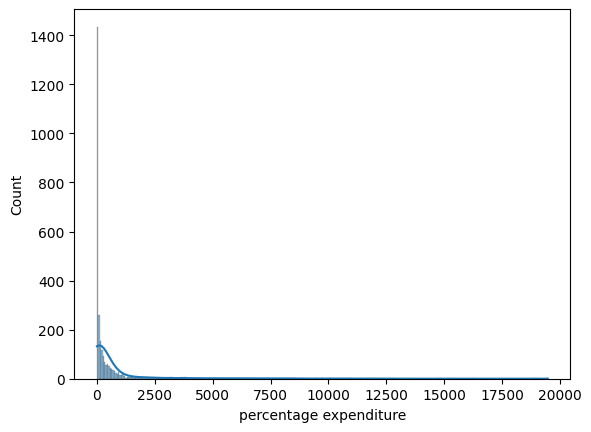

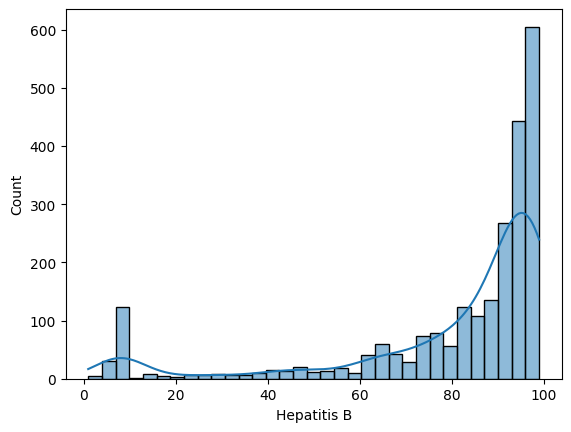

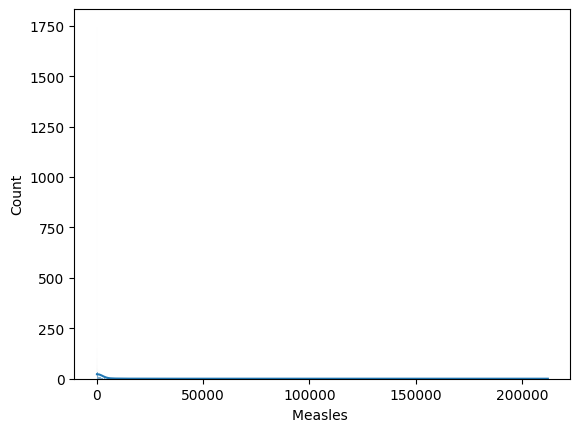

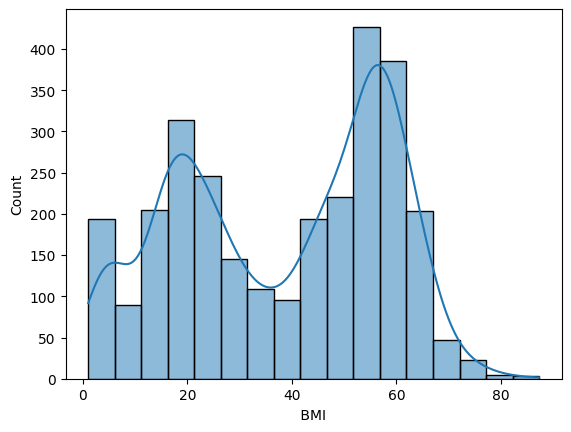

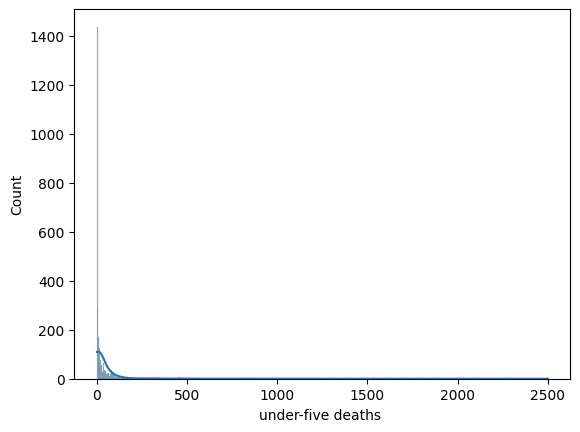

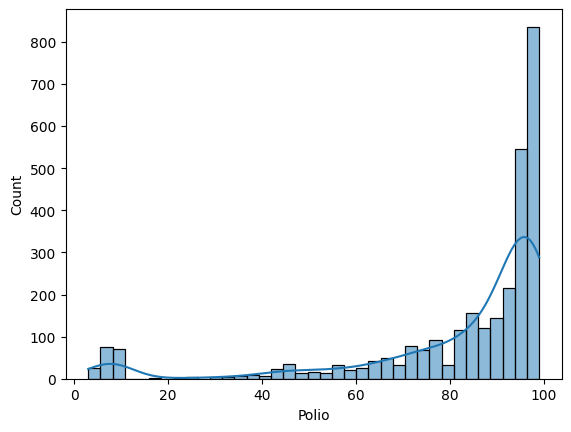

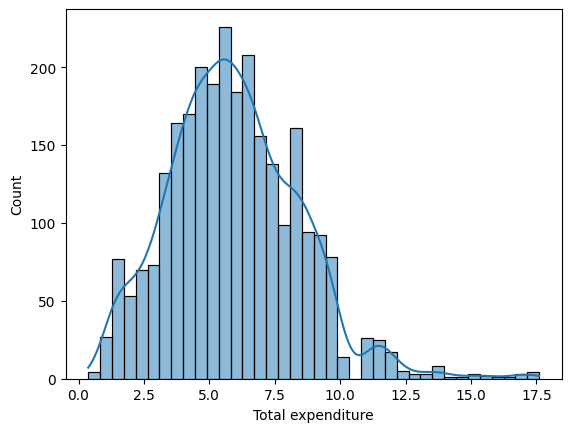

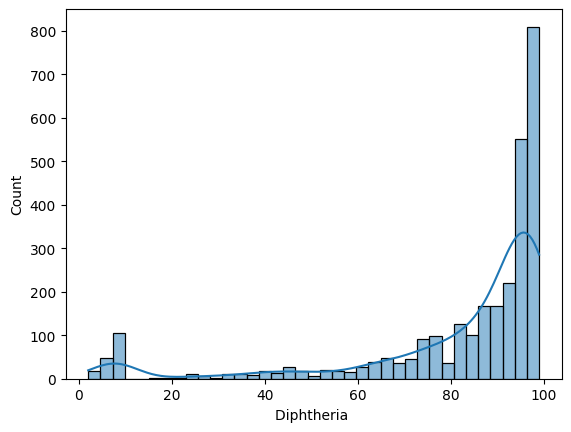

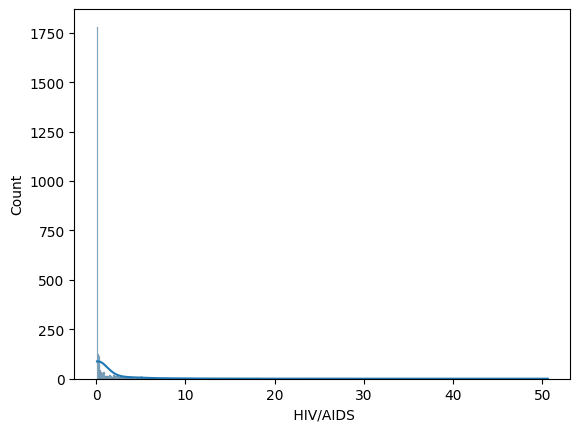

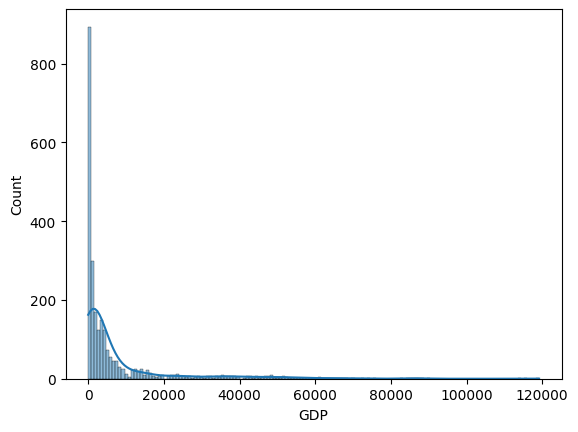

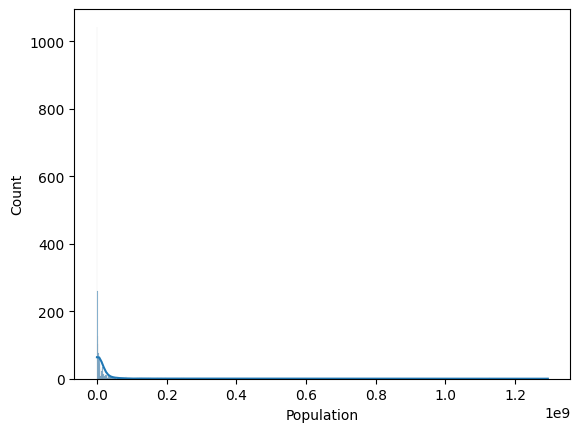

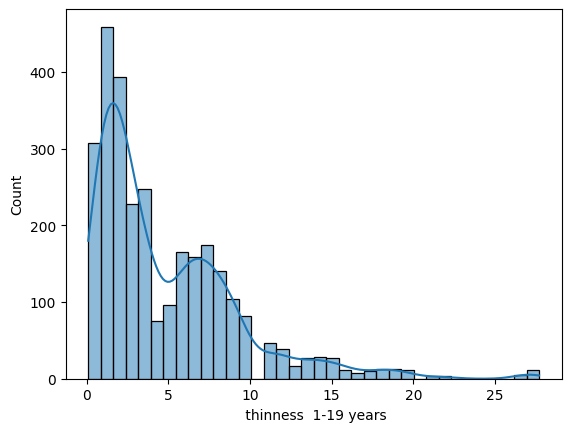

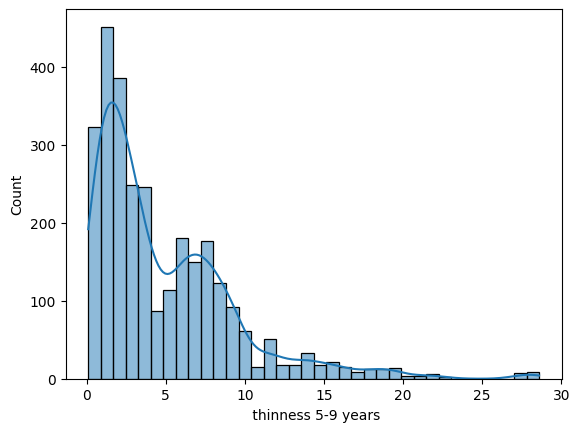

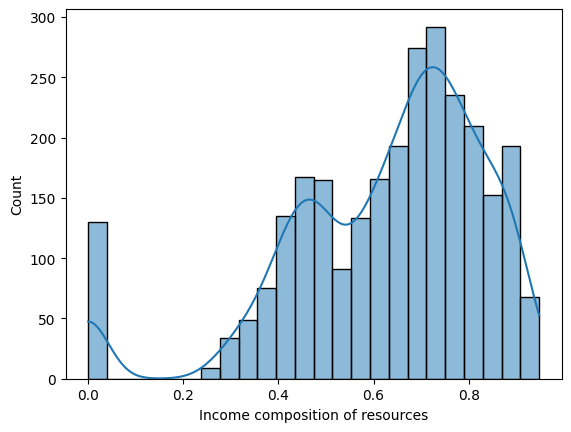

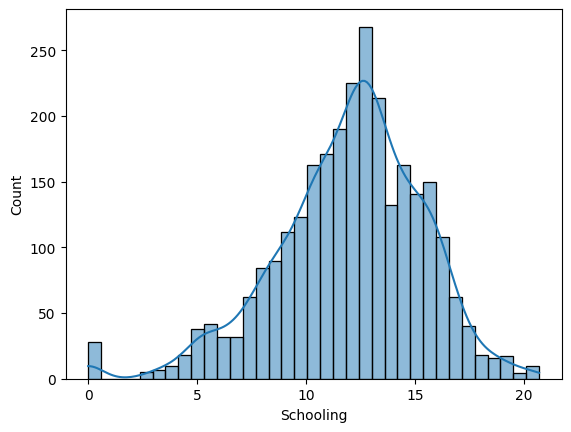

In [17]:
#Distibution for all the numerical columns
#for better distribution outlier(unusual data point) must be removed
for i in df.select_dtypes(include = 'number').columns:
  sns.histplot(data=df, x=df[i], kde=True)
  plt.show()

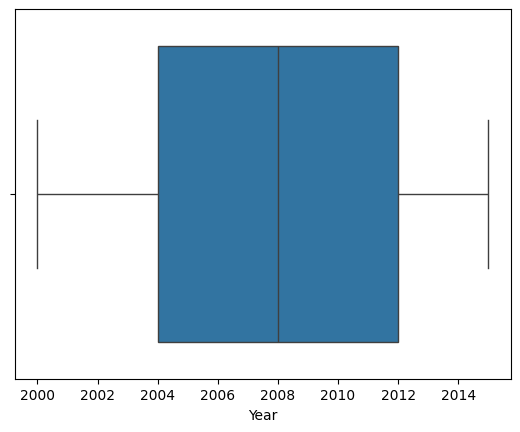

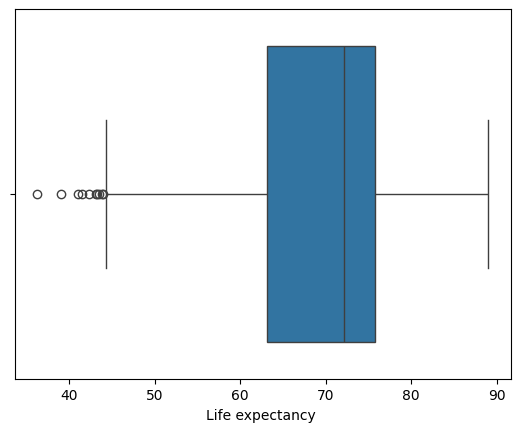

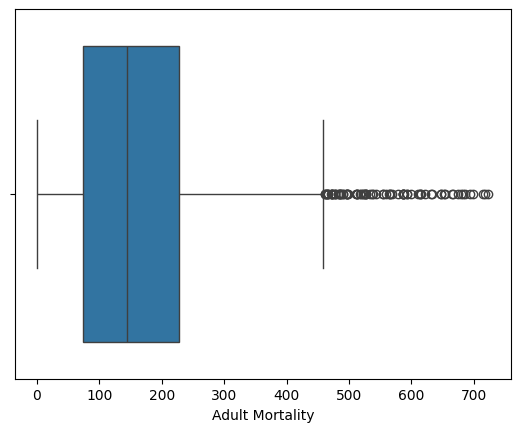

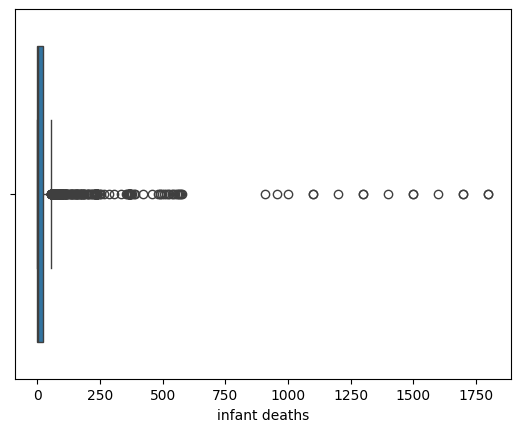

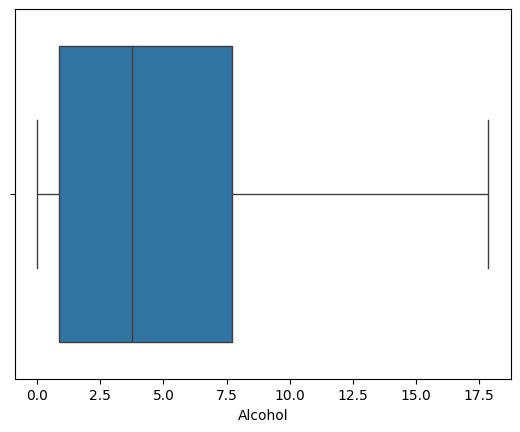

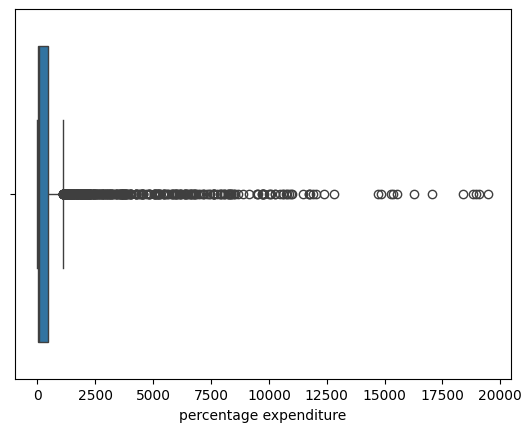

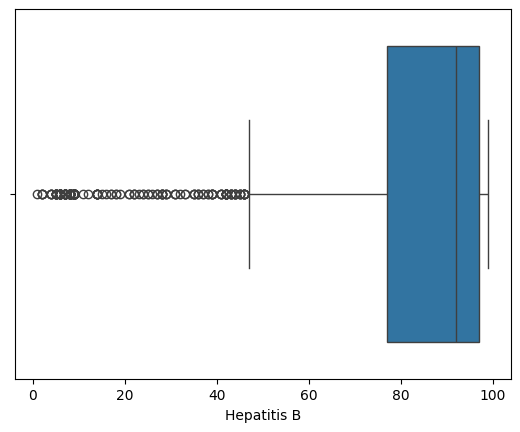

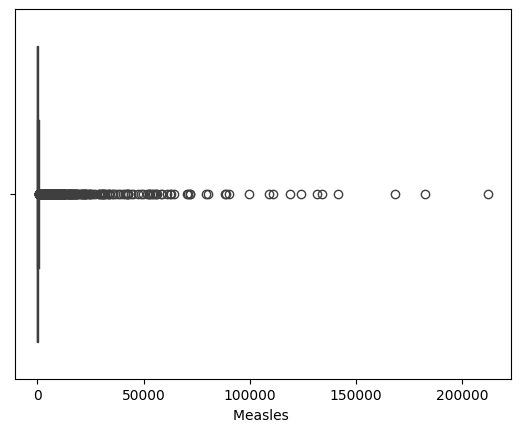

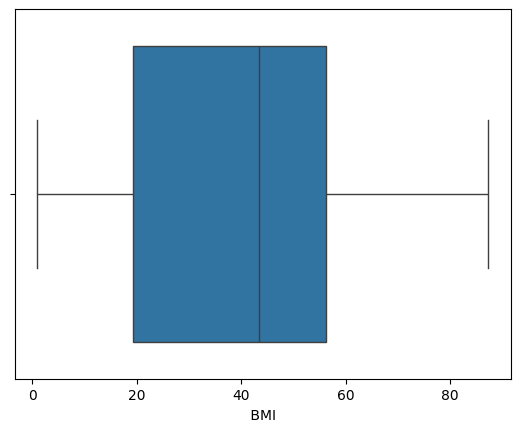

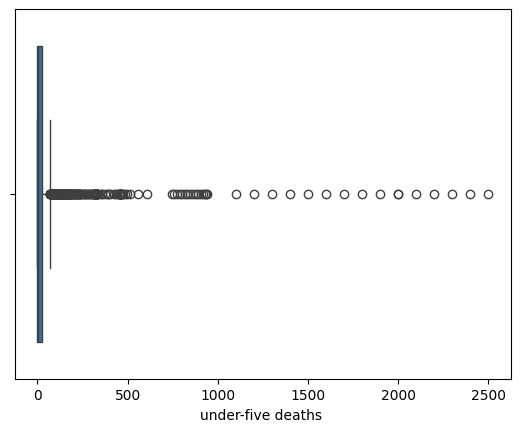

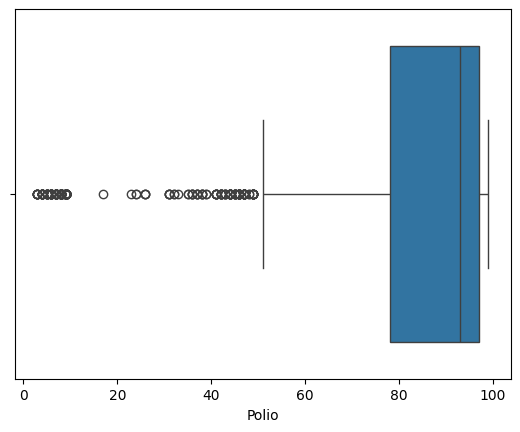

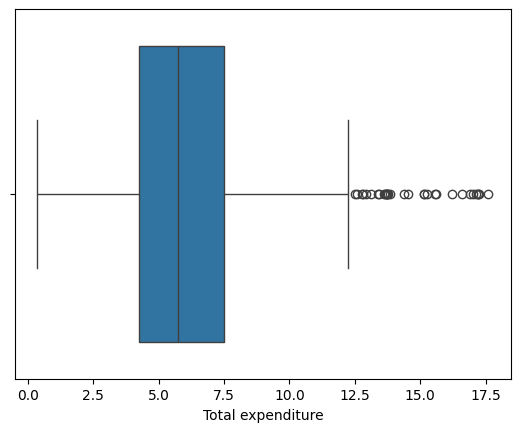

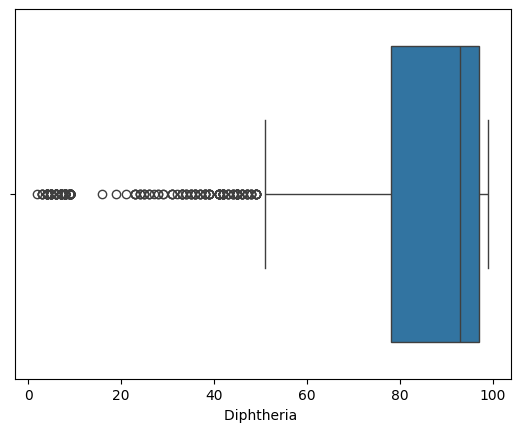

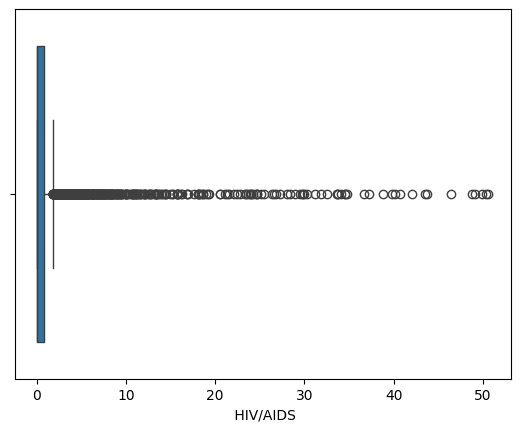

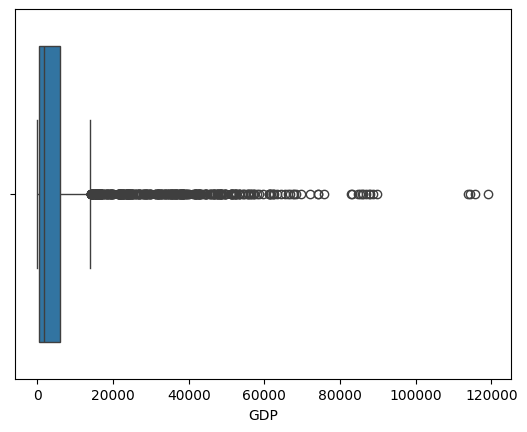

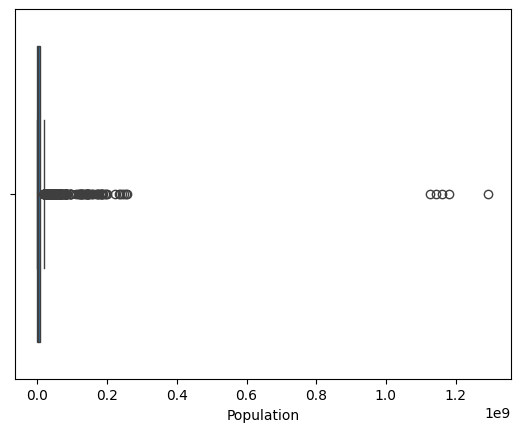

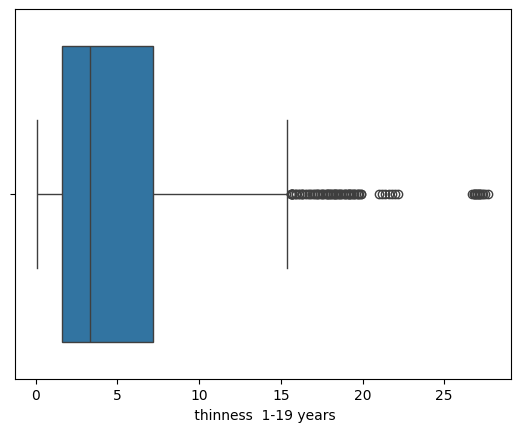

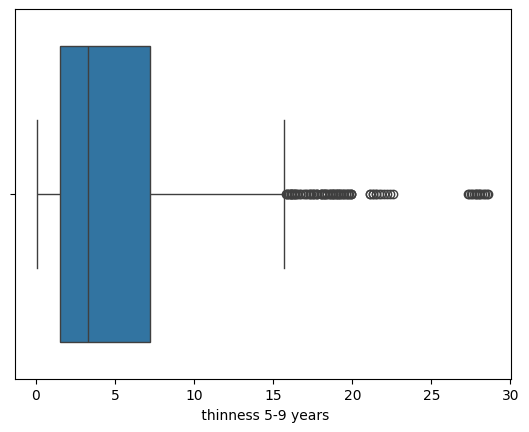

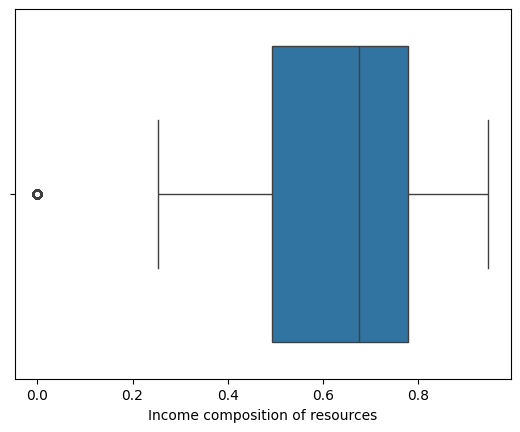

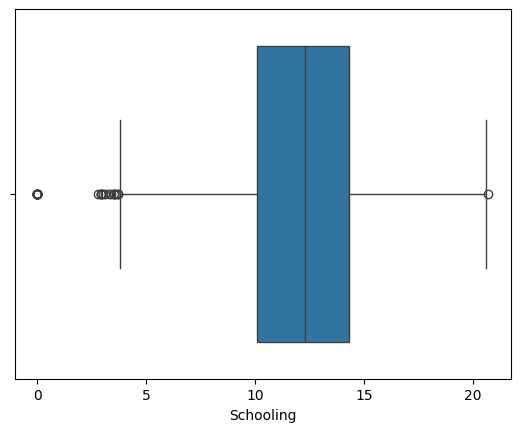

In [18]:
#outliers detection
#a variable that is way low than the lower percentile(25%)
#way to high than the high percentile(75%)
#Box plot
for i in df.select_dtypes(include = 'number').columns:
  sns.boxplot(data=df, x=df[i])
  plt.show()

<Axes: xlabel='Schooling', ylabel='Life expectancy '>

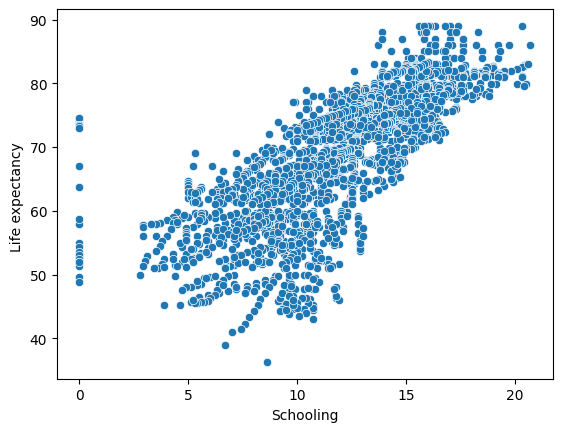

In [19]:
#Bi- variant analysis(relationship between 2 variables(columns))
#scatter plot(cartesian plane)
#Life expectancy
sns.scatterplot(data=df, x=df['Schooling'], y=df['Life expectancy '])

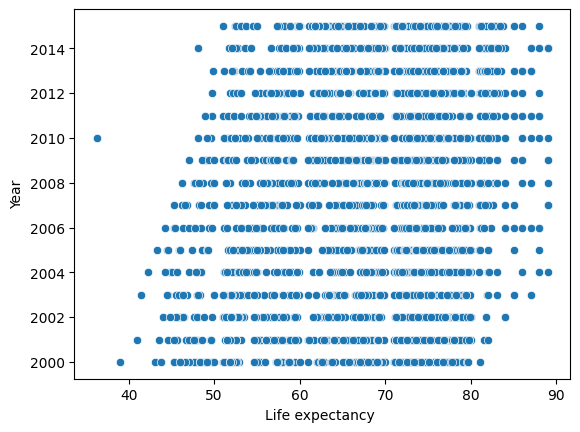

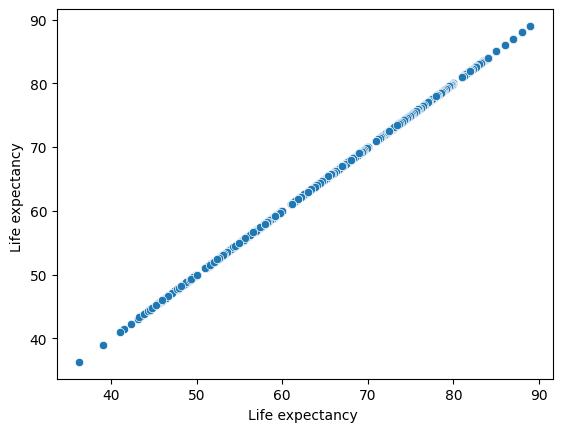

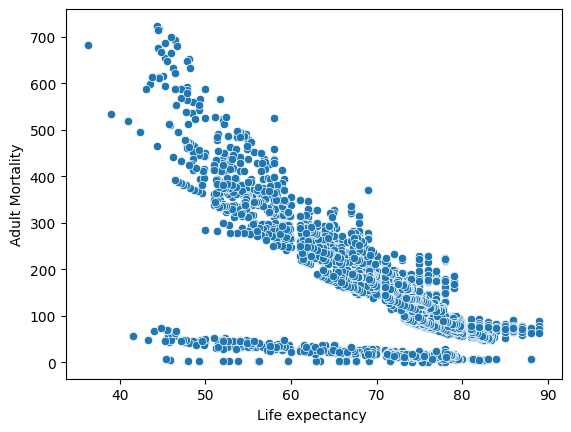

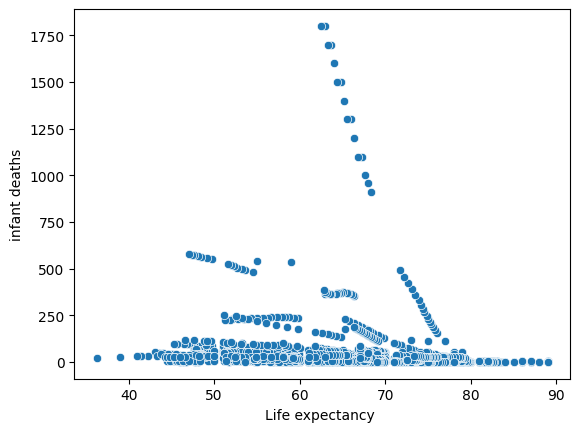

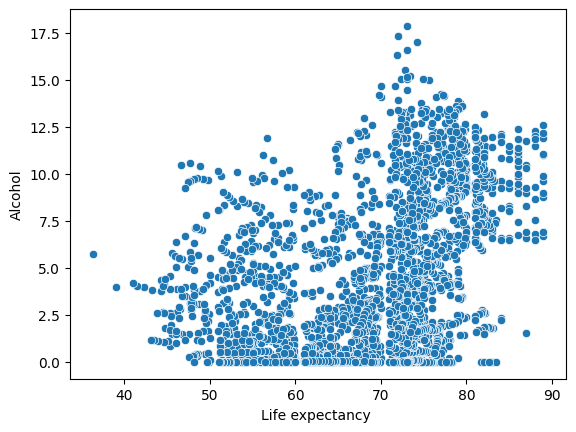

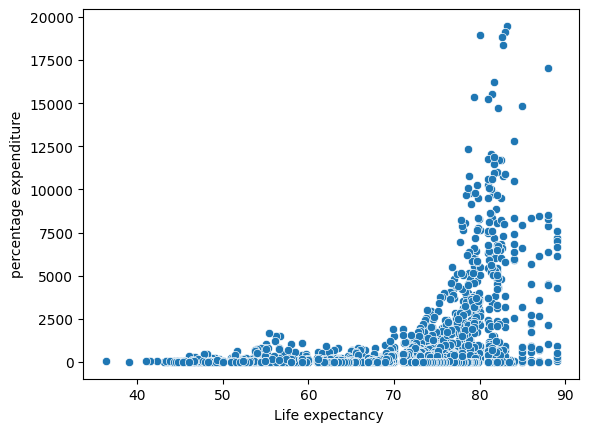

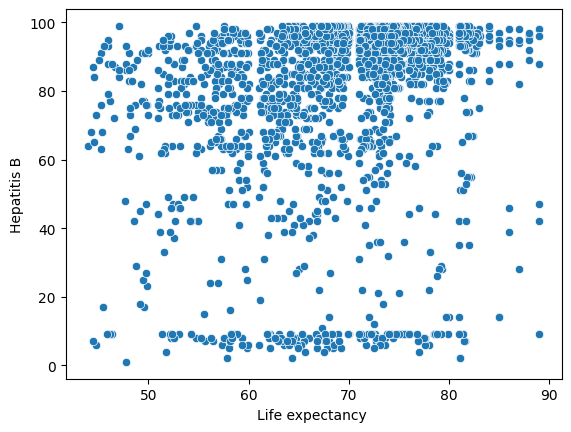

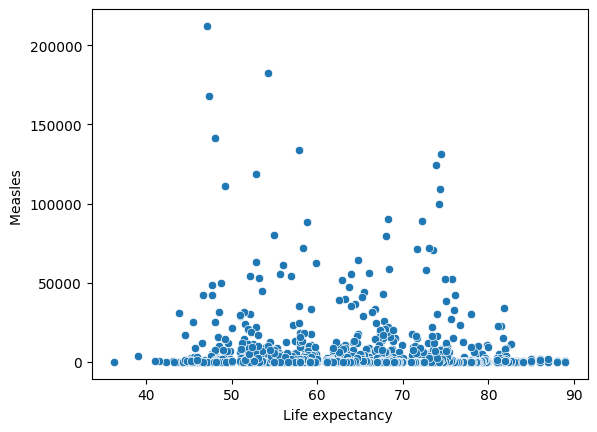

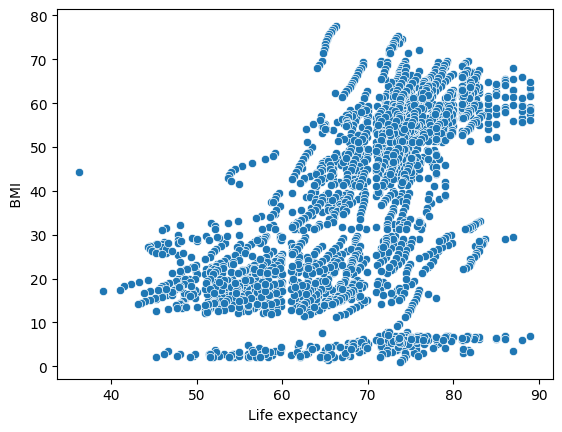

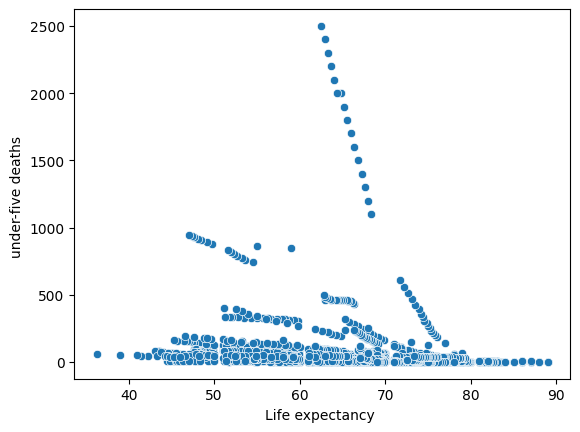

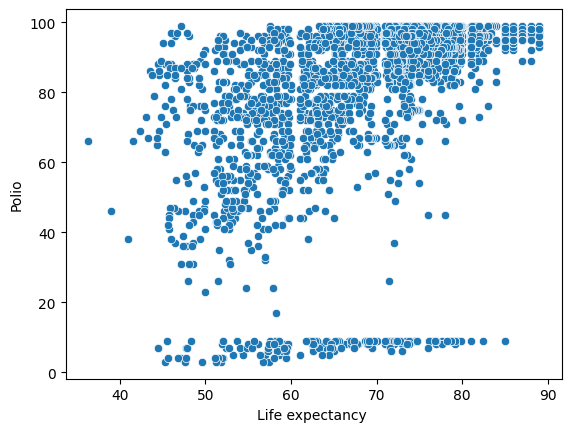

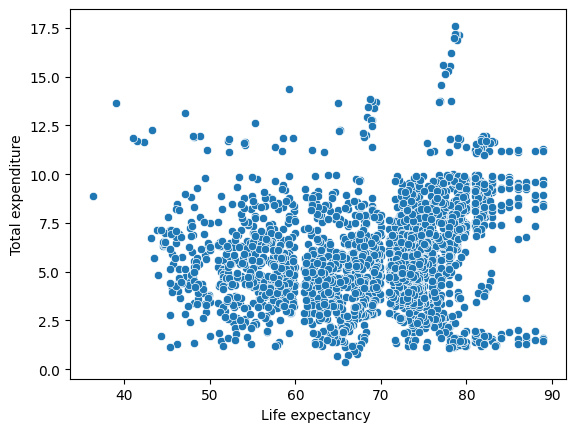

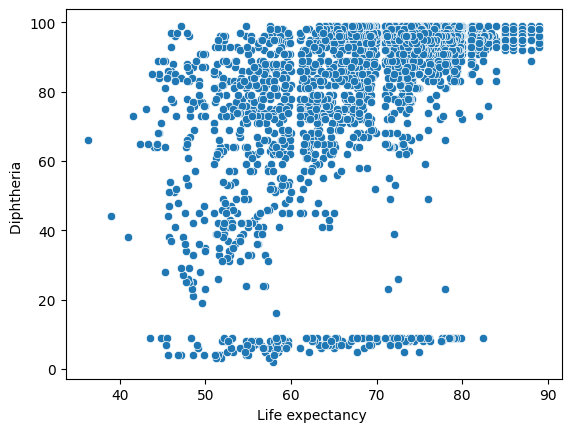

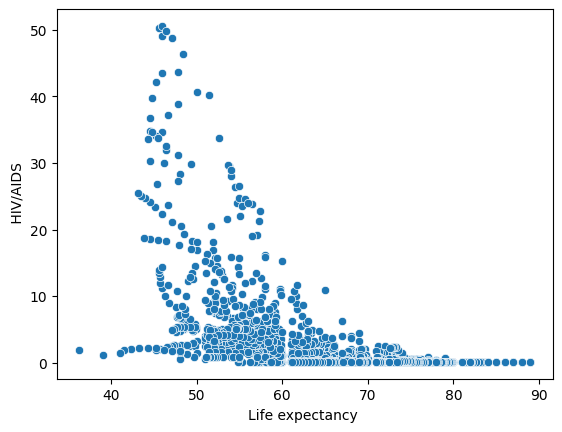

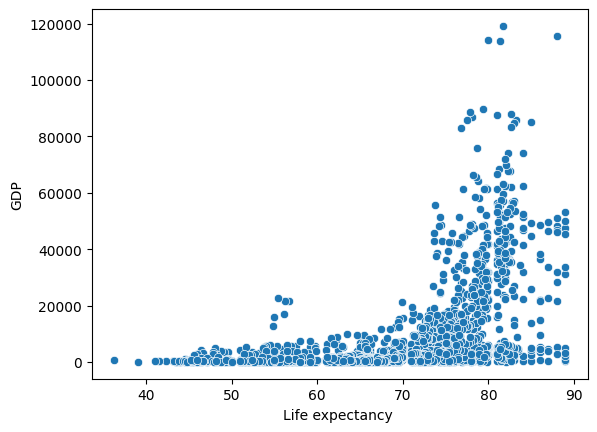

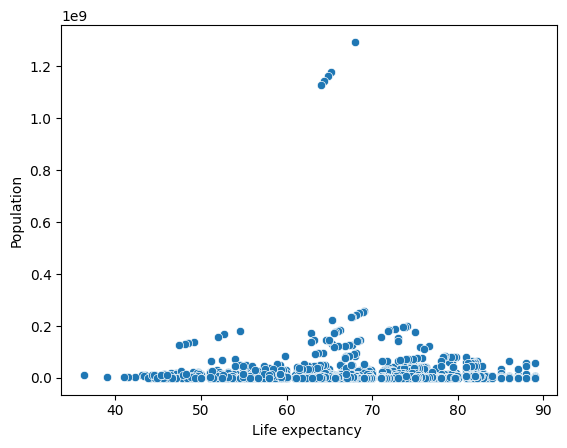

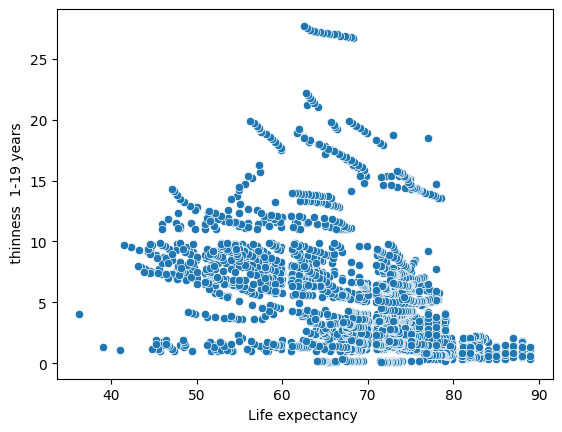

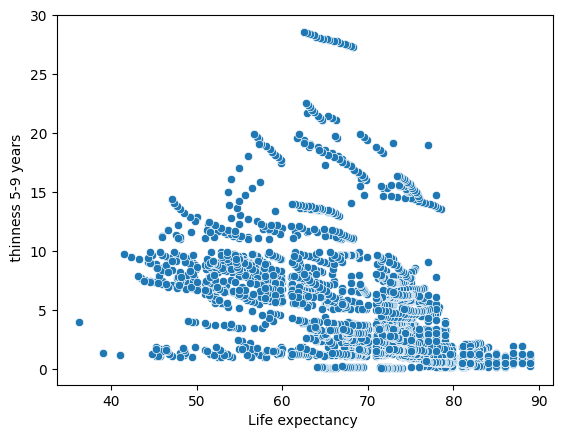

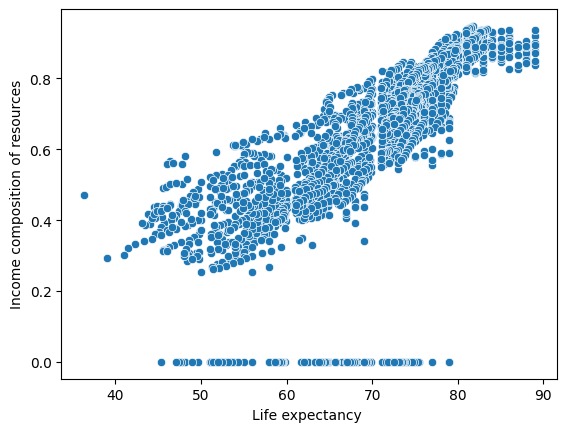

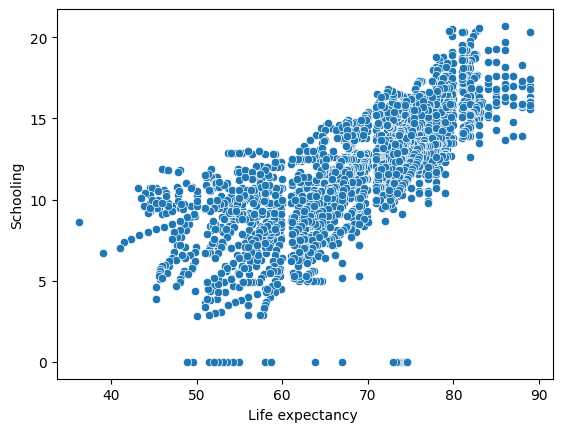

In [20]:
#check relationship btwn life expectancy, and other numerical columns
for i in df.select_dtypes(include= 'number').columns:
  sns.scatterplot(data=df, x=df['Life expectancy '], y=df[i])
  plt.show()



<Axes: >

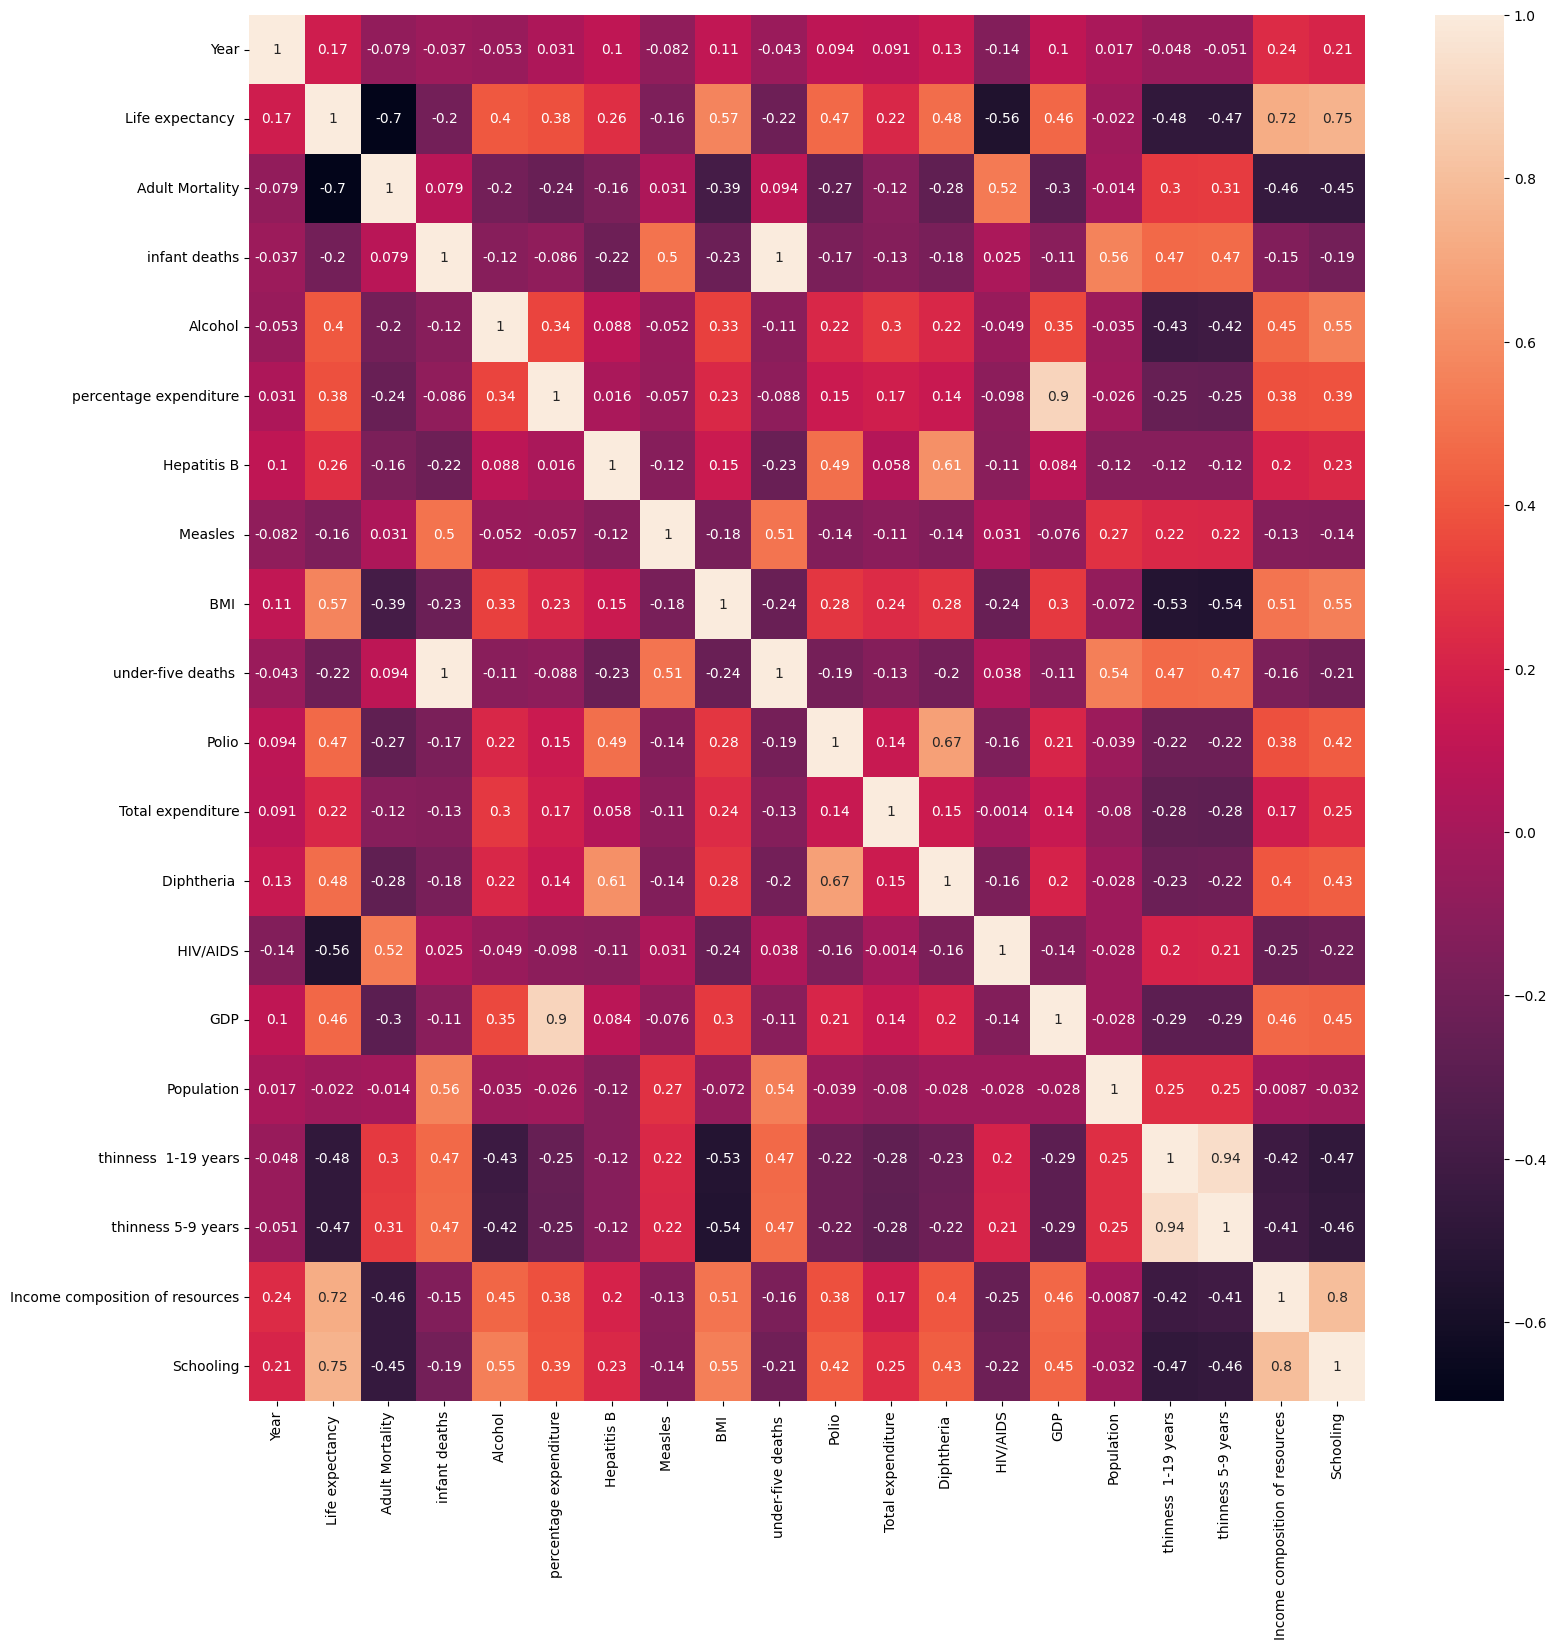

In [21]:
#correlation analysis
df.select_dtypes(include='number').corr()
#correlation on heatmaps
plt.figure(figsize=(18,18))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)

In [22]:
#funtions recap with return types
#every function must have a return type
def add_num(num1:int,num2:int):
  answer = num1 + num2
  return answer



In [23]:
result = add_num(10,20)
print(result)

30


####HANDLING MISSING VALUES


In [24]:
#to handle missing values, we can use different techniques,mean,mode,median or KNNimputer
#check missing values
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [ ]:
#numerical columns
#statistical
#continous: mean or median
#discrete: mode
#categorical: mode

In [28]:
#life expectancy
mean_life = df['Life expectancy '].mean()
#fill the mean expectancy
df['Life expectancy '].fillna(mean_life, inplace=True)
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [36]:
for i in [' BMI ', "Polio", "Income composition of resources"]:
  df[i].fillna(df[i].mean(), inplace=True)


In [37]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [38]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [42]:
#KNNimputer
from sklearn.impute import KNNImputer
imputer = KNNImputer()
df['Schooling'] = imputer.fit_transform(df[['Schooling']])

df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [44]:
for i in df.select_dtypes(include = 'number').columns:
  df[i] = imputer.fit_transform(df[[i]])



In [45]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


#####STEP 6: HANDLING OUTLIERS
SOUCRE:chatGPT: An outlier, a data point that significantly differs from othr data points in a dataset
IQR how to calculate,
ordder the data , arrange in ascending order.

find the quartiles
firstl quatile(Q1) median of the lower half of the data
second quatile(Q3)median of uppper half of the data

calculate subract Q1 from Q3
Q3 - Q1 = IQR

In [46]:

#LW: lower bound (25th percintile)
#up: upper bound (75th percentile)
#iqr = uw - lw

def remove_outliers(col):
  lw = df[col].quantile(0.25)
  uw = df[col].quantile(0.75)
  iqr = uw - lw
  upper_bound = uw + (1.5*iqr)
  lower_bound = lw - (1.5*iqr)
  return upper_bound, lower_bound

In [51]:
remove_outliers('Life expectancy ')

(94.19999999999999, 44.600000000000016)

In [52]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [60]:
from threading import Condition
for i in ['GDP','Total expenditure', ' thinness  1-19 years',' thinness 5-9 years']:
  upper_bound, lower_bound = remove_outliers(i)

#conditions
#condition - (df[i]>=lower_limit)&(df[i]<=upperlimit)
  condition = (df[i] <= upper_bound) & (df[i] >= lower_bound)
  df = df[condition]

In [61]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
14,Afghanistan,2001.0,Developing,55.3,316.0,88.0,0.01,10.574728,63.0,8762.0,...,35.0,7.80,33.0,0.1,117.496980,2966463.0,2.1,2.4,0.340,5.9
15,Afghanistan,2000.0,Developing,54.8,321.0,88.0,0.01,10.424960,62.0,6532.0,...,24.0,8.20,24.0,0.1,114.560000,293756.0,2.3,2.5,0.338,5.5
16,Albania,2015.0,Developing,77.8,74.0,0.0,4.60,364.975229,99.0,0.0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
17,Albania,2014.0,Developing,77.5,8.0,0.0,4.51,428.749067,98.0,0.0,...,98.0,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2
18,Albania,2013.0,Developing,77.2,84.0,0.0,4.76,430.876979,99.0,0.0,...,99.0,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004.0,Developing,44.3,723.0,27.0,4.36,0.000000,68.0,31.0,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003.0,Developing,44.5,715.0,26.0,4.06,0.000000,7.0,998.0,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002.0,Developing,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001.0,Developing,45.3,686.0,25.0,1.72,0.000000,76.0,529.0,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


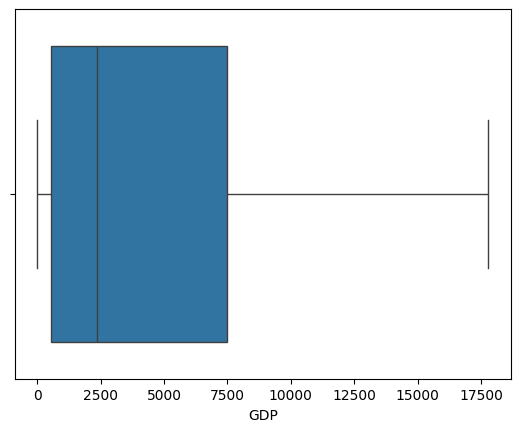

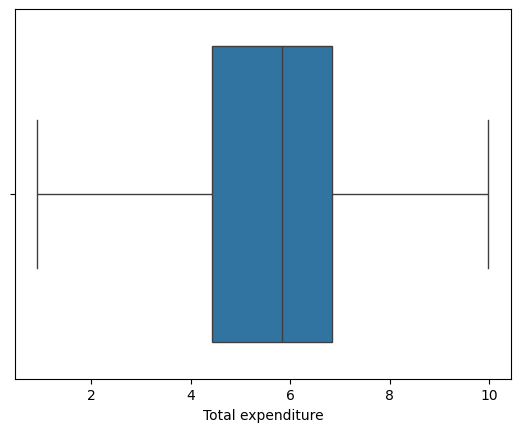

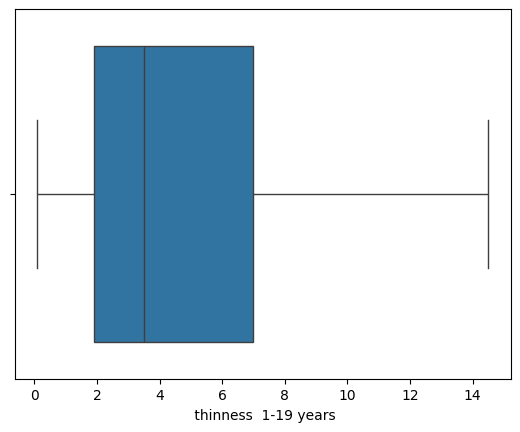

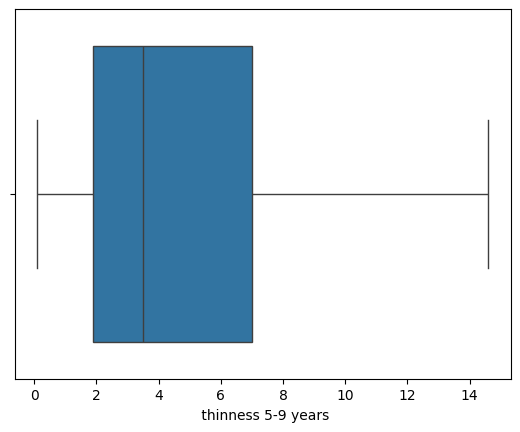

In [62]:
for i in ['GDP','Total expenditure', ' thinness  1-19 years',' thinness 5-9 years']:
  sns.boxplot(data=df, x=i)
  plt.show()

####STEP 9: LABEL ENCODING
The process of converting text data to a numerical representation

In [ ]:
#e.g Gender(male - 1, female - 2)

#####NORMALIZATION:
It is used to adjust the values of numerical data, so that they fit within a specific range or follow a particular scale.
standard scaler